In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/amazon-customer-reviews/Amazon-Cusomer-analysis-Reviews.csv


Importing the date 

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt 

In [4]:
df=pd.read_csv('/kaggle/input/amazon-customer-reviews/Amazon-Cusomer-analysis-Reviews.csv')
df.shape

(568454, 10)

In [5]:
df.head

<bound method NDFrame.head of             Id   ProductId          UserId                      ProfileName  \
0            1  B001E4KFG0  A3SGXH7AUHU8GW                       delmartian   
1            2  B00813GRG4  A1D87F6ZCVE5NK                           dll pa   
2            3  B000LQOCH0   ABXLMWJIXXAIN  Natalia Corres "Natalia Corres"   
3            4  B000UA0QIQ  A395BORC6FGVXV                             Karl   
4            5  B006K2ZZ7K  A1UQRSCLF8GW1T    Michael D. Bigham "M. Wassir"   
...        ...         ...             ...                              ...   
568449  568450  B001EO7N10  A28KG5XORO54AY                 Lettie D. Carter   
568450  568451  B003S1WTCU  A3I8AFVPEE8KI5                        R. Sawyer   
568451  568452  B004I613EE  A121AA1GQV751Z                    pksd "pk_007"   
568452  568453  B004I613EE   A3IBEVCTXKNOH          Kathy A. Welch "katwel"   
568453  568454  B001LR2CU2  A3LGQPJCZVL9UC                         srfell17   

        HelpfulnessNu

Cleaning the data where the 

In [6]:
df.columns

Index(['Id', 'ProductId', 'UserId', 'ProfileName', 'HelpfulnessNumerator',
       'HelpfulnessDenominator', 'Score', 'Time', 'Summary', 'Text'],
      dtype='object')

Exploratory data analysys 

In [7]:
df_valid = df[df['HelpfulnessDenominator'] >= df['HelpfulnessNumerator']]

In [8]:
df_valid.columns


Index(['Id', 'ProductId', 'UserId', 'ProfileName', 'HelpfulnessNumerator',
       'HelpfulnessDenominator', 'Score', 'Time', 'Summary', 'Text'],
      dtype='object')

In [9]:
#Removing the duplicate wehere the customer has given review at same time 
df_valid.duplicated(['UserId','ProfileName','Time','Text'])

0         False
1         False
2         False
3         False
4         False
          ...  
568449    False
568450    False
568451    False
568452    False
568453    False
Length: 568452, dtype: bool

In [10]:
df_valid[df_valid.duplicated(['UserId','ProfileName','Time','Text'])]

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
29,30,B0001PB9FY,A3HDKO7OW0QNK4,Canadian Fan,1,1,5,1107820800,The Best Hot Sauce in the World,I don't know if it's the cactus or the tequila...
574,575,B000G6RYNE,A3PJZ8TU8FDQ1K,Jared Castle,2,2,5,1231718400,"One bite and you'll become a ""chippoisseur""","I'm addicted to salty and tangy flavors, so wh..."
1973,1974,B0017165OG,A2EPNS38TTLZYN,tedebear,0,0,3,1312675200,Pok Chops,The pork chops from Omaha Steaks were very tas...
2309,2310,B0001VWE0M,AQM74O8Z4FMS0,Sunshine,0,0,2,1127606400,Below standard,Too much of the white pith on this orange peel...
2323,2324,B0001VWE0C,AQM74O8Z4FMS0,Sunshine,0,0,2,1127606400,Below standard,Too much of the white pith on this orange peel...
...,...,...,...,...,...,...,...,...,...,...
568409,568410,B0018CLWM4,A2PE0AGWV6OPL7,Dark Water Mermaid,3,3,5,1309651200,Quality & affordable food,I was very pleased with the ingredient quality...
568410,568411,B0018CLWM4,A88HLWDCU57WG,R28,2,2,5,1332979200,litter box,My main reason for the five star review has to...
568411,568412,B0018CLWM4,AUX1HSY8FX55S,DAW,1,1,5,1319500800,Happy Camper,I bought this to try on two registered Maine C...
568412,568413,B0018CLWM4,AVZ2OZ479Q9E8,Ai Ling Chow,0,0,5,1336435200,Two Siberians like it!,When we brought home two 3-month-old purebred ...


In [11]:
data = df_valid.drop_duplicates(subset=['UserId','ProfileName','Time','Text'])

In [12]:
data.shape

(393931, 10)

In [13]:
data.dtypes

Id                         int64
ProductId                 object
UserId                    object
ProfileName               object
HelpfulnessNumerator       int64
HelpfulnessDenominator     int64
Score                      int64
Time                       int64
Summary                   object
Text                      object
dtype: object

In [14]:
data['Time']

0         1303862400
1         1346976000
2         1219017600
3         1307923200
4         1350777600
             ...    
568449    1299628800
568450    1331251200
568451    1329782400
568452    1331596800
568453    1338422400
Name: Time, Length: 393931, dtype: int64

In [15]:
data['Time']= pd.to_datetime(data['Time'] , unit='s')

<ipython-input-15-38aae04ce8ef>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Time']= pd.to_datetime(data['Time'] , unit='s')


In [16]:
import warnings
from warnings import filterwarnings
filterwarnings('ignore')

**Recomnendations using ML ****# 

Problem statement : 
Analyse to which user amazonm can recomend more products 

Conversion rate : 
Advertisement --> amazon 

In [17]:
data.shape

(393931, 10)

In [18]:
data.columns 

Index(['Id', 'ProductId', 'UserId', 'ProfileName', 'HelpfulnessNumerator',
       'HelpfulnessDenominator', 'Score', 'Time', 'Summary', 'Text'],
      dtype='object')

In [19]:
data['ProfileName'].nunique()

218415

In [20]:
data['UserId'].nunique()

256059

In [21]:
data.columns 

Index(['Id', 'ProductId', 'UserId', 'ProfileName', 'HelpfulnessNumerator',
       'HelpfulnessDenominator', 'Score', 'Time', 'Summary', 'Text'],
      dtype='object')

In [22]:
recomend_df = data.groupby(['UserId']).agg({'Summary':'count','Text':'count','Score':'mean','ProductId':'count'}).sort_values(by='ProductId',ascending = False)

In [23]:
recomend_df.columns = ["Number_of_summaries" , "num_text" , "avg_score","No_of_products_purchased" ]

In [24]:
recomend_df.columns

Index(['Number_of_summaries', 'num_text', 'avg_score',
       'No_of_products_purchased'],
      dtype='object')

In [25]:
recomend_df.index[0:10]

Index(['AY12DBB0U420B', 'A3OXHLG6DIBRW8', 'A281NPSIMI1C2R', 'A1YUL9PCJR3JTY',
       'A1Z54EM24Y40LL', 'A2MUGFV2TDQ47K', 'A3D6OI36USYOU1', 'AZV26LP92E6WU',
       'AKMEY1BSHSDG7', 'A2GEZJHBV92EVR'],
      dtype='object', name='UserId')

In [26]:
recomend_df["No_of_products_purchased"][0:10].values

array([329, 278, 259, 214, 211, 161, 146, 129, 119, 118])

Text(0.5, 1.0, 'Customers to be recomended with more products ')

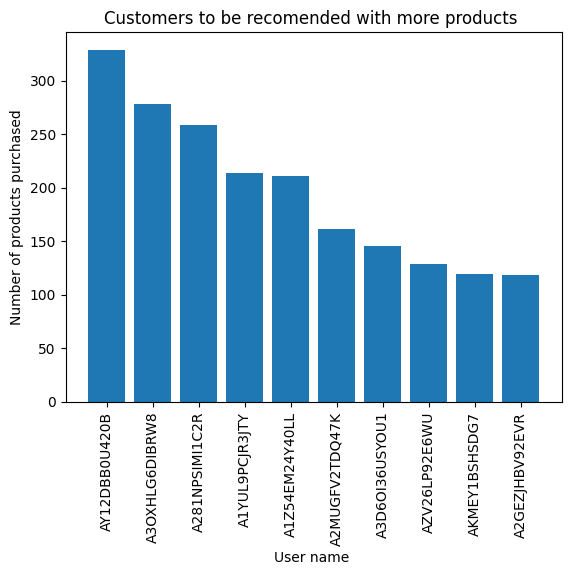

In [27]:
plt.bar(recomend_df.index[0:10] ,recomend_df["No_of_products_purchased"][0:10].values )
plt.xticks(rotation="vertical")
plt.xlabel("User name ")
plt.ylabel("Number of products purchased")
plt.title("Customers to be recomended with more products ")



**Which product have the Higher review**

In [28]:
data.columns 


Index(['Id', 'ProductId', 'UserId', 'ProfileName', 'HelpfulnessNumerator',
       'HelpfulnessDenominator', 'Score', 'Time', 'Summary', 'Text'],
      dtype='object')

In [29]:
data['ProductId'].nunique()

67624

Frequent sold product : Sold more than 500 times 

In [30]:
product_count = data['ProductId'].value_counts().to_frame()

In [31]:
product_count

,count
ProductId,
B007JFMH8M,912
B002QWP89S,630
B003B3OOPA,622
B001EO5Q64,566
B0013NUGDE,558
...,...
B002DNX4GO,1
B000FM2YU2,1
B001M1VA32,1


In [32]:
product_count[product_count['count']>500]

,count
ProductId,
B007JFMH8M,912
B002QWP89S,630
B003B3OOPA,622
B001EO5Q64,566
B0013NUGDE,558
B000KV61FC,556
B000UBD88A,542
B000NMJWZO,542
B005K4Q37A,541


In [33]:
freq_prod_ids = product_count[product_count['count']>500].index

In [34]:
freq_prod_ids

Index(['B007JFMH8M', 'B002QWP89S', 'B003B3OOPA', 'B001EO5Q64', 'B0013NUGDE',
       'B000KV61FC', 'B000UBD88A', 'B000NMJWZO', 'B005K4Q37A', 'B0090X8IPM',
       'B005ZBZLT4'],
      dtype='object', name='ProductId')

In [35]:
data['ProductId'].isin(freq_prod_ids)

0         False
1         False
2         False
3         False
4         False
          ...  
568449    False
568450    False
568451    False
568452    False
568453    False
Name: ProductId, Length: 393931, dtype: bool

frequest_product_df = data[data['ProductId'].isin(freq_prod_ids)]

In [36]:
frequest_prod_df = data[data['ProductId'].isin(freq_prod_ids)]

In [37]:
frequest_prod_df

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
20982,20983,B002QWP89S,A21U4DR8M6I9QN,"K. M Merrill ""justine""",1,1,5,2011-10-18,addictive! but works for night coughing in dogs,my 12 year old sheltie has chronic brochotitis...
20983,20984,B002QWP89S,A17TDUBB4Z1PEC,jaded_green,1,1,5,2011-10-14,genuine Greenies best price,"These are genuine Greenies product, not a knoc..."
20984,20985,B002QWP89S,ABQH3WAWMSMBH,tenisbrat87,1,1,5,2011-09-28,Perfect for our little doggies,"Our dogs love Greenies, but of course, which d..."
20985,20986,B002QWP89S,AVTY5M74VA1BJ,tarotqueen,1,1,5,2011-09-24,dogs love greenies,"What can I say, dogs love greenies. They begg ..."
20986,20987,B002QWP89S,A13TNN54ZEAUB1,dcz2221,1,1,5,2011-09-23,Greenies review,This review is for a box of Greenies Lite for ...
...,...,...,...,...,...,...,...,...,...,...
563878,563879,B007JFMH8M,A366PSH7KFLRPB,TheRosySnail,0,0,5,2012-07-29,Yummy!,I loved these cookies and so did my kids. You ...
563879,563880,B007JFMH8M,A2KV6EYQPKJRR5,Kelley,0,0,5,2012-07-28,Quaker Soft Baked Cookies,This is a great tasting cookie. It is very sof...
563880,563881,B007JFMH8M,A3O7REI0OSV89M,Esme,0,0,4,2012-07-28,Delicious!,These are great for a quick snack! They are sa...
563881,563882,B007JFMH8M,A9JS5GQQ6GIQT,Syne,0,0,5,2012-07-28,yummy,I love the Quaker soft baked cookies. The rea...


In [38]:
frequest_prod_df.columns

Index(['Id', 'ProductId', 'UserId', 'ProfileName', 'HelpfulnessNumerator',
       'HelpfulnessDenominator', 'Score', 'Time', 'Summary', 'Text'],
      dtype='object')

[Text(0.5, 0, 'Count of Reviews'),
 Text(0, 0.5, 'ASIN'),
 Text(0.5, 1.0, 'Rating score of frequently sold Products')]

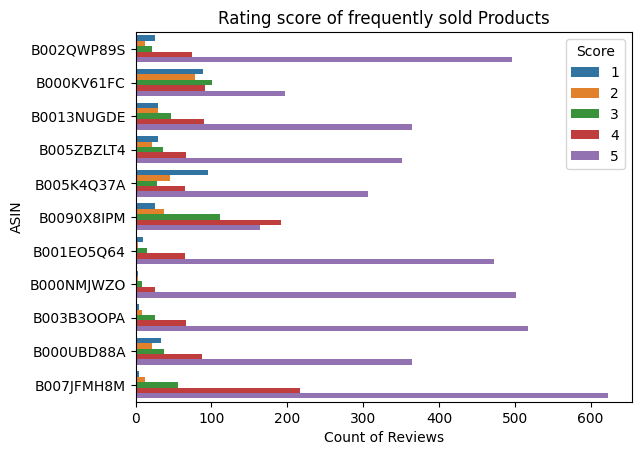

In [87]:
sns.countplot(y= 'ProductId' , data = frequest_prod_df , hue = 'Score').set(xlabel ="Count of Reviews", ylabel = "ASIN", title ='Rating score of frequently sold Products')

Customore Behaviour  :
Difference between Frequent and non frequent viewers  :


Frequent viewer :  Customer who bought a prodcut atleast 50 times 
< 50 not frequest viewer 

In [40]:
data.columns

Index(['Id', 'ProductId', 'UserId', 'ProfileName', 'HelpfulnessNumerator',
       'HelpfulnessDenominator', 'Score', 'Time', 'Summary', 'Text'],
      dtype='object')

In [41]:
x = data['UserId'].value_counts()

In [42]:
x

UserId
AY12DBB0U420B     329
A3OXHLG6DIBRW8    278
A281NPSIMI1C2R    259
A1YUL9PCJR3JTY    214
A1Z54EM24Y40LL    211
                 ... 
AAQPR1MSRXKTU       1
AGO81Z6PZSF7P       1
ALA84XWMTQBFT       1
A1G9DK8EUR36JC      1
A3LGQPJCZVL9UC      1
Name: count, Length: 256059, dtype: int64

In [43]:
data.head

<bound method NDFrame.head of             Id   ProductId          UserId                      ProfileName  \
0            1  B001E4KFG0  A3SGXH7AUHU8GW                       delmartian   
1            2  B00813GRG4  A1D87F6ZCVE5NK                           dll pa   
2            3  B000LQOCH0   ABXLMWJIXXAIN  Natalia Corres "Natalia Corres"   
3            4  B000UA0QIQ  A395BORC6FGVXV                             Karl   
4            5  B006K2ZZ7K  A1UQRSCLF8GW1T    Michael D. Bigham "M. Wassir"   
...        ...         ...             ...                              ...   
568449  568450  B001EO7N10  A28KG5XORO54AY                 Lettie D. Carter   
568450  568451  B003S1WTCU  A3I8AFVPEE8KI5                        R. Sawyer   
568451  568452  B004I613EE  A121AA1GQV751Z                    pksd "pk_007"   
568452  568453  B004I613EE   A3IBEVCTXKNOH          Kathy A. Welch "katwel"   
568453  568454  B001LR2CU2  A3LGQPJCZVL9UC                         srfell17   

        HelpfulnessNu

In [44]:
data['viewer_type'] = data['UserId'].apply(lambda user : "Frequent" if x[user]>50 else 'Not Frequent')

In [45]:
data.head(3)

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,viewer_type
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,2011-04-27,Good Quality Dog Food,I have bought several of the Vitality canned d...,Not Frequent
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,2012-09-07,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,Not Frequent
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,2008-08-18,"""Delight"" says it all",This is a confection that has been around a fe...,Not Frequent


In [46]:
data['viewer_type'].unique()

array(['Not Frequent', 'Frequent'], dtype=object)

In [47]:
not_freq_df = data[data['viewer_type']=='Not Frequent']
freq_df = data[data['viewer_type']=='Frequent']

In [48]:
freq_df['Score'].value_counts()

Score
5    5765
4    1979
3     897
2     368
1     349
Name: count, dtype: int64

In [49]:
freq_df['Score'].value_counts()/len(freq_df)*100

Score
5    61.605044
4    21.147681
3     9.585381
2     3.932464
1     3.729429
Name: count, dtype: float64

In [50]:
not_freq_df['Score'].value_counts()

Score
5    245196
4     54114
1     35957
3     28872
2     20434
Name: count, dtype: int64

In [51]:
not_freq_df['Score'].value_counts()/len(not_freq_df)*100

Score
5    63.757986
4    14.071191
1     9.349850
3     7.507547
2     5.313426
Name: count, dtype: float64

Text(0, 0.5, 'Number of ratings received ')

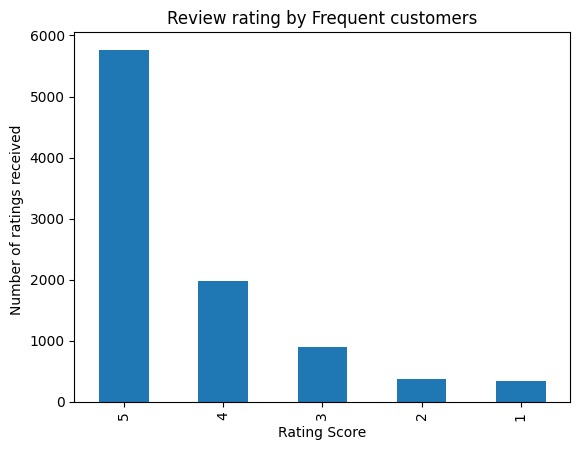

In [86]:
freq_df['Score'].value_counts().plot(kind = 'bar')
plt.title("Review rating by Frequent customers")
plt.xlabel("Rating Score")
plt.ylabel("Number of ratings received ")

Text(0, 0.5, 'Number of ratings received ')

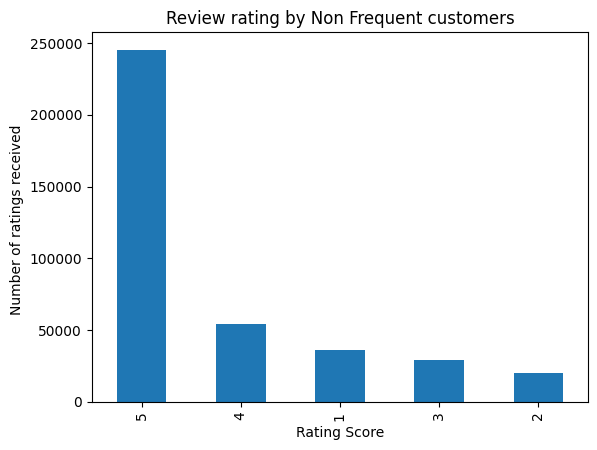

In [85]:
plt.title("Review rating by Non Frequent customers")
not_freq_df['Score'].value_counts().plot(kind = 'bar')
plt.xlabel("Rating Score")
plt.ylabel("Number of ratings received ")

In [54]:
data.columns

Index(['Id', 'ProductId', 'UserId', 'ProfileName', 'HelpfulnessNumerator',
       'HelpfulnessDenominator', 'Score', 'Time', 'Summary', 'Text',
       'viewer_type'],
      dtype='object')

In [55]:
data['Text']

0         I have bought several of the Vitality canned d...
1         Product arrived labeled as Jumbo Salted Peanut...
2         This is a confection that has been around a fe...
3         If you are looking for the secret ingredient i...
4         Great taffy at a great price.  There was a wid...
                                ...                        
568449    Great for sesame chicken..this is a good if no...
568450    I'm disappointed with the flavor. The chocolat...
568451    These stars are small, so you can give 10-15 o...
568452    These are the BEST treats for training and rew...
568453    I am very satisfied ,product is as advertised,...
Name: Text, Length: 393931, dtype: object

In [56]:
data[['UserId','ProductId','Text']]

,UserId,ProductId,Text
0,A3SGXH7AUHU8GW,B001E4KFG0,I have bought several of the Vitality canned d...
1,A1D87F6ZCVE5NK,B00813GRG4,Product arrived labeled as Jumbo Salted Peanut...
2,ABXLMWJIXXAIN,B000LQOCH0,This is a confection that has been around a fe...
3,A395BORC6FGVXV,B000UA0QIQ,If you are looking for the secret ingredient i...
4,A1UQRSCLF8GW1T,B006K2ZZ7K,Great taffy at a great price. There was a wid...
...,...,...,...
568449,A28KG5XORO54AY,B001EO7N10,Great for sesame chicken..this is a good if no...
568450,A3I8AFVPEE8KI5,B003S1WTCU,I'm disappointed with the flavor. The chocolat...
568451,A121AA1GQV751Z,B004I613EE,"These stars are small, so you can give 10-15 o..."
568452,A3IBEVCTXKNOH,B004I613EE,These are the BEST treats for training and rew...


Verbose of the Users dependent on the frequenecy 

In [57]:
data['Text'][0]

'I have bought several of the Vitality canned dog food products and have found them all to be of good quality. The product looks more like a stew than a processed meat and it smells better. My Labrador is finicky and she appreciates this product better than  most.'

In [58]:
len(data['Text'][0].split(' '))

49

In [59]:
def calculate_length(text):
    return len(text.split(' '))

In [60]:
data['Text_Length'] = data['Text'].apply(calculate_length)

In [61]:
data['viewer_type'].unique()

array(['Not Frequent', 'Frequent'], dtype=object)

In [62]:
not_freq_data = data[data['viewer_type']=='Not Frequent']
freq_data = data[data['viewer_type']=='Frequent']

In [63]:
not_freq_data

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,viewer_type,Text_Length
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,2011-04-27,Good Quality Dog Food,I have bought several of the Vitality canned d...,Not Frequent,49
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,2012-09-07,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,Not Frequent,31
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,2008-08-18,"""Delight"" says it all",This is a confection that has been around a fe...,Not Frequent,99
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,2011-06-13,Cough Medicine,If you are looking for the secret ingredient i...,Not Frequent,43
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,2012-10-21,Great taffy,Great taffy at a great price. There was a wid...,Not Frequent,30
...,...,...,...,...,...,...,...,...,...,...,...,...
568449,568450,B001EO7N10,A28KG5XORO54AY,Lettie D. Carter,0,0,5,2011-03-09,Will not do without,Great for sesame chicken..this is a good if no...,Not Frequent,26
568450,568451,B003S1WTCU,A3I8AFVPEE8KI5,R. Sawyer,0,0,2,2012-03-09,disappointed,I'm disappointed with the flavor. The chocolat...,Not Frequent,46
568451,568452,B004I613EE,A121AA1GQV751Z,"pksd ""pk_007""",2,2,5,2012-02-21,Perfect for our maltipoo,"These stars are small, so you can give 10-15 o...",Not Frequent,71
568452,568453,B004I613EE,A3IBEVCTXKNOH,"Kathy A. Welch ""katwel""",1,1,5,2012-03-13,Favorite Training and reward treat,These are the BEST treats for training and rew...,Not Frequent,37


(0.0, 600.0)

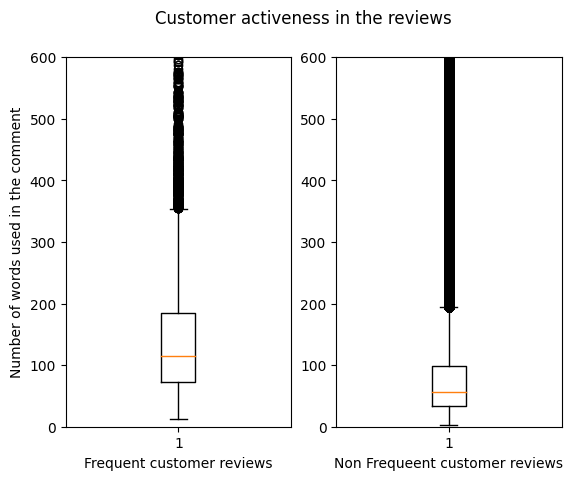

In [83]:
fig = plt.figure()
#fig.title("Sports Watch Data")

fig.suptitle("Customer activeness in the reviews ")
ax1 = fig.add_subplot(121)
ax1.boxplot(freq_data['Text_Length'])
ax1.set_xlabel('Frequent customer reviews')
ax1.set_ylabel('Number of words used in the comment')

ax1.set_ylim(0,600)
ax2 = fig.add_subplot(122)
ax2.boxplot(not_freq_data['Text_Length'])
ax2.set_xlabel('Non Frequeent customer reviews')
ax2.set_ylim(0,600)


EDA:
Sentiment Anlysys : 
Anlysing the intensions / feeling 
Using the textBlob


In [65]:
from textblob import TextBlob


In [66]:
data['Summary'][0]

'Good Quality Dog Food'

In [67]:
TextBlob('Good Quality Dog Food').sentiment.polarity

0.7

In [68]:
data.shape

(393931, 12)

In [69]:
sample = data[0:5000]

In [70]:
polarity = []

for text in sample['Summary']:
    try:
        polarity.append(TextBlob(text).sentiment.polarity)
    except:
        polarity.append(0)

In [71]:
len(polarity)

5000

In [72]:
sample['polarity'] = polarity

In [73]:
sample

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,viewer_type,Text_Length,polarity
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,2011-04-27,Good Quality Dog Food,I have bought several of the Vitality canned d...,Not Frequent,49,0.7
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,2012-09-07,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,Not Frequent,31,0.0
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,2008-08-18,"""Delight"" says it all",This is a confection that has been around a fe...,Not Frequent,99,0.0
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,2011-06-13,Cough Medicine,If you are looking for the secret ingredient i...,Not Frequent,43,0.0
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,2012-10-21,Great taffy,Great taffy at a great price. There was a wid...,Not Frequent,30,0.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5010,5011,B000KOWNHE,A2ZMZU5LQP9NIA,"Arlene ""AH""",0,0,5,2008-08-17,BEST Gravy ever!,This is the best ever. Just add HOT water and...,Not Frequent,43,1.0
5011,5012,B000KOWNHE,A1QU292HLS3FCF,Shirlene Ross,0,0,5,2008-05-05,Pioneer Brand Peppered Gravy Mix,"<a href=""http://www.amazon.com/gp/product/B000...",Not Frequent,55,0.0
5012,5013,B000HDKZDC,A23TNRHKURH7YU,Stephanie Newcomb,4,4,5,2009-05-21,Best cereal bars on the planet,We use these for our daughter for a few reason...,Not Frequent,113,1.0
5013,5014,B000HDKZDC,ADLW3LV9MZRUY,"Daniel Robbins ""Ninja""",4,4,5,2007-11-21,Yummy,These are really excellent breakfast bars. Not...,Not Frequent,46,0.0


In [74]:
sample_ne = sample[sample['polarity']<0]
sample_po = sample[sample['polarity']>0]

In [75]:
sample_ne['Summary']

16                            poor taste
26                       Nasty No flavor
57                 How can you go wrong!
61                      pretty expensive
62                        stale product.
                      ...               
4925    I had 3 EMPTY tea bags...BEWARE!
4969                      Deadly Product
4978                    Not good quality
5002                   taste just awful!
5004          Too expensive to buy here.
Name: Summary, Length: 455, dtype: object

In [76]:
from collections import Counter 

In [77]:
Counter(sample_ne['Summary']).most_common(10)

[('Awful', 6),
 ('Not Good', 4),
 ('Disappointing', 3),
 ('Disgusting', 3),
 ('Addicted', 3),
 ('Not good', 3),
 ('Not impressed', 3),
 ('disappointing', 2),
 ('Disappointed', 2),
 ('Disappointed!', 2)]

In [78]:
Counter(sample_po['Summary']).most_common(10)

[('Delicious', 19),
 ('Delicious!', 18),
 ('Great', 13),
 ('Great product', 10),
 ('Excellent', 9),
 ('Love it!', 8),
 ('The Best', 8),
 ('Good', 6),
 ('Great Product', 6),
 ('delicious', 6)]